# Workshop 2: Signal Analysis in Frequency Domain



In [336]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal

## 2.1 Fourier series approximation
fourier series approximation of the oroginal periodic signal with N number of harmonics
$x(t) \approx x_N (t) = \sum a_k e^{jk\omega _0 t}$

### PL 1 - done in tab
Find the Fourier Series coefficients for the square wave given in Figure 1. [Graded] Hint: Take 𝑇1 = T/4 

### PL 2 - done
Taking 𝐴 = 1 V, 𝑇 = 1𝑠 complete the function 𝑎(𝑘) to return the Fourier series coefficients of the square
wave for given any integer value of 𝑘. [Graded]

In [337]:
# square pulse
def square(t):
    if t%1<0.25 or t%1>0.75:
        s=1
    elif t%1 == 0.25 or t%1 == 0.75:
        s= 0.5
    else:
        s = 0
    return s


fourier coeff are given by $a_k = \frac{1}{T} $ ...

In [338]:
# fourier coefficients
def a(k):
    """returns the fourier coefficients of the given function A=1, T=1 square pulse"""
    if k==0:
        a_k = 0.25*2*1 # integral of signal over one interval div by period 
    else:
        a_k = np.sin(k*np.pi/2)/(k*np.pi)
    return a_k


### Q3 -done
Complete the function fs_approx(t,N) to return the value of a Fourier series approximated periodic
signal, at any given time. (Graded)


In [339]:
# fourier series approxmated signal
def fs_approx(t,N):
    """return FS approx signal"""
    x_t = 0
    for k in range(-N, N+1):
        a_k = a(k)
        x_t += a_k*np.exp(1j*k*2*np.pi*t) # find complex value
        # x_t += a_k*np.cos(k*2*np.pi*t) # find real part only
    return x_t

### Q4 - done
Q: Update the python script according to the following guidelines. [Graded]
1. Create the array t with equally spaced 1000 elements in the interval [−2.5, 2.5]
2. Use the square(t) function to fill the array x with the values of square wave at each time instant in the
array 𝑡.
3. Use the function fs_approx(t,N) to fill the array y with the function values of the Fourier series approximated square wave.

In [340]:
# Fourier series approximation of the square wave
x=[]
y=[]
N = 5 #CHANGE HERE
time = np.arange(-2.5, 2.5, 0.005) # array of 1000 elements equally spaced between -2.5and 2.5
x = [square(t) for t in time] # square pulse
for t in time:
    y.append(fs_approx(t,N))


### Q5 -done

Q: Write a Python script to plot the original signal, 𝑥(𝑡) and the approximated signal, 𝑥𝑁(𝑡) in the same
figure for 𝑁 = 5. [Graded] Q: Plot the original signal, 𝑥(𝑡) and the approximated signal, 𝑥𝑁(𝑡) in the same
figure for 𝑁 = 50. [Graded] Q: Comment on your observations. ( i.e. for 𝑁 = 5 and 𝑁 = 50

For N=5

/home/nilaunix/miniconda3/envs/signal-s2/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/nilaunix/miniconda3/envs/signal-s2/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


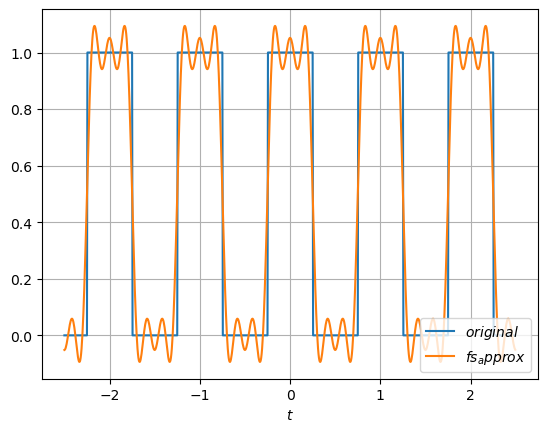

In [341]:
fig,ax = plt.subplots()
ax.plot(time,x, label=r'$original$')
ax.plot(time,y, label=r'$fs_approx$') #plot the real part

ax.set_xlabel('$t$')
plt.legend(loc='lower right')
ax.grid(True)

plt.show()

For N=50

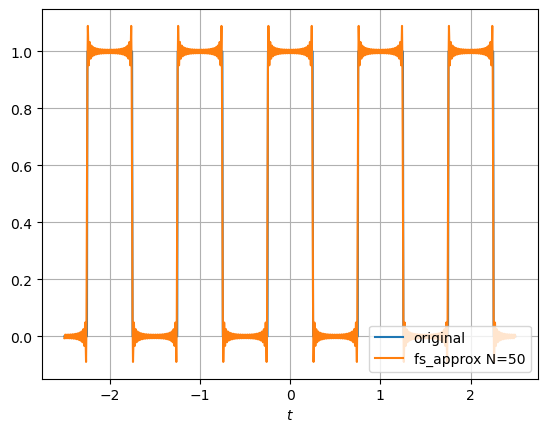

In [342]:
N2 = 50
y2 = []
for t in time:
    y2.append(fs_approx(t,N2))

# plot curves
fig,ax = plt.subplots()
ax.plot(time,x, label='original')
ax.plot(time,y2, label='fs_approx N=50')

ax.set_xlabel('$t$')
plt.legend(loc='lower right')
ax.grid(True)

plt.show()

## 2.2 Fourier Series Coefficients [Graded]
### 2.2.1 - done
Create the two arrays k and ak with integers in the interval 𝑘 = −20, . . . , 20 and the Fourier series coefficients
of the square wave for each 𝑘 value in the array, respectively. Use stem() function to plot the Fourier series
coefficients against 𝑘. Q: Plot normalized Fast Fourier Transform (FFT) coefficients in 𝑋norm vs 𝑘 with stem()
function. Use set_xlim() function to limit the x-axis to the interval [−20, 20] . [Graded]


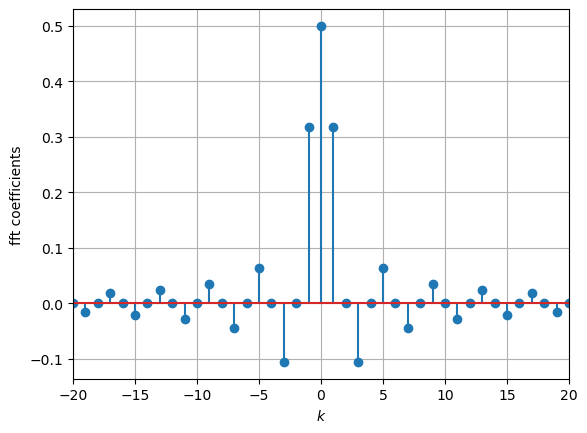

In [343]:
# k = np.arange(-20,21)
# ak = []
# for k in time:
#     ak.append(a(k))

N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))

# Obtaining FFT coefficients
X = fftshift(fft(x))
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)

# plotting fft coefficients
fig,ax=plt.subplots()
ax.stem(k,X_norm)
ax.set_xlim(-20,20)
ax.set_xlabel('$k$')
ax.set_ylabel('fft coefficients')
ax.grid(True)

### 2.2.2 
Q: Comment on the observations from the above codes. [Graded]
\
\
first two grpahs are in time domain the last one is in frequency domain. the same signals representation in two domains is observed here.

## 2.3 Ideal Filters and Actual Filters

### 2.3.Q1

Q: Complete the function 𝑥(𝑡) to return the function value given in the following equation
𝑥(𝑡) = 𝑎1 sin(𝜔1𝑡) + 𝑎2 sin(𝜔2𝑡) + 𝑎3 sin(𝜔3𝑡) (2.4)
where 𝑎1 = 0.75, 𝑎2 = 1, 𝑎3 = 0.5, 𝜔1= 100𝜋, 𝜔2 = 400𝜋, 𝜔3 = 800𝜋 [Graded]

In [344]:
# Creating 3 sinusoidal signals
w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2*np.pi*fs

def x(t):
    x_t = a1*np.sin(w1*t)+ a2*np.sin(w2*t)+ a3*np.sin(w3*t)
    return x_t

### 2.3.Q2
Q: Write a python code to plot the waveform in time domain. Limit the 𝑥-axis to the interval [0, 0.04].
[Graded]

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_654/330553598.py:9: SyntaxWarning: invalid escape sequence '\s'
  ax.title.set_text('Input signal in time domain\n $𝑥(𝑡) = 0.75 \sin(100\pi  𝑡) + 1.0 \sin(400\pi 𝑡) + 0.5 sin(800\pi 𝑡)$')


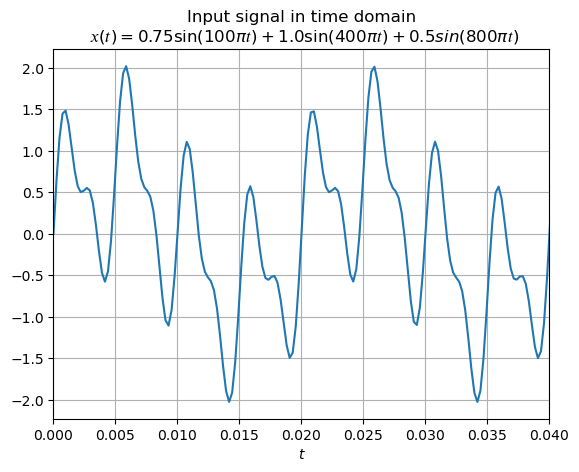

In [345]:
time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]

# Plotting the input signal in time domain
fig,ax = plt.subplots()
ax.plot(time,xt, label='signal in TD')
ax.set_xlabel('$t$')
ax.set_xlim(0,0.04)
ax.title.set_text('Input signal in time domain\n $𝑥(𝑡) = 0.75 \sin(100\pi  𝑡) + 1.0 \sin(400\pi 𝑡) + 0.5 sin(800\pi 𝑡)$')
ax.grid(True)
plt.show()

### 2.3.Q3
Q: Complete the python code for plotting ***absolute*** value of the Fourier transform of 𝑥(𝑡), that is 𝑋𝜔
against the angular frequency 𝜔. Execute the cell and sketch the result. [Graded]


In [346]:
# ws == 2*np.pi*fs

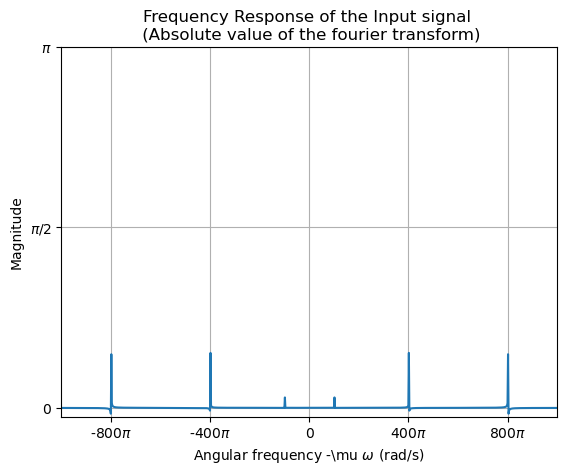

In [347]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws-ws/2

# plotting the input signal in the frequency domain
fig, ax = plt.subplots()
ax.plot(w,Xw)
ax.set_title('Frequency Response of the Input signal \n (Absolute value of the fourier transform)')
ax.set_xlabel('Angular frequency -'+r'\mu $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([(str(i)+(r'$\pi$' if i else '')) for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

$𝑥(𝑡) = 0.75 \sin(100\pi  𝑡) + 1.0 \sin(400\pi 𝑡) + 0.5 sin(800\pi 𝑡)$

An ideal filter with a given frequency response can be used to obtain the sinusoid with the angular frequency of 𝜔2 = 400𝜋, as the output waveform. $\omega _{c1}$ and $\omega _{c2}$ are cutoff freqs and taken as midpoints of the impulses

Q: Complete the function, ideal_filter(w) to output the 𝐻(𝑗𝜔). [Graded]

In [348]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
    # Your code goes here
    gain = 1
    if (abs(w)<wc1) or (abs(w)>wc2):
        gain = 0
    return gain

Q: Use the ideal_filter(w) function to fill the list 𝐻0𝑤, with the ideal filter value for each element in 𝑤. Complete
the following code and sketch the output below. [Graded]


## 2.3.1 Ideal Filter: Part A

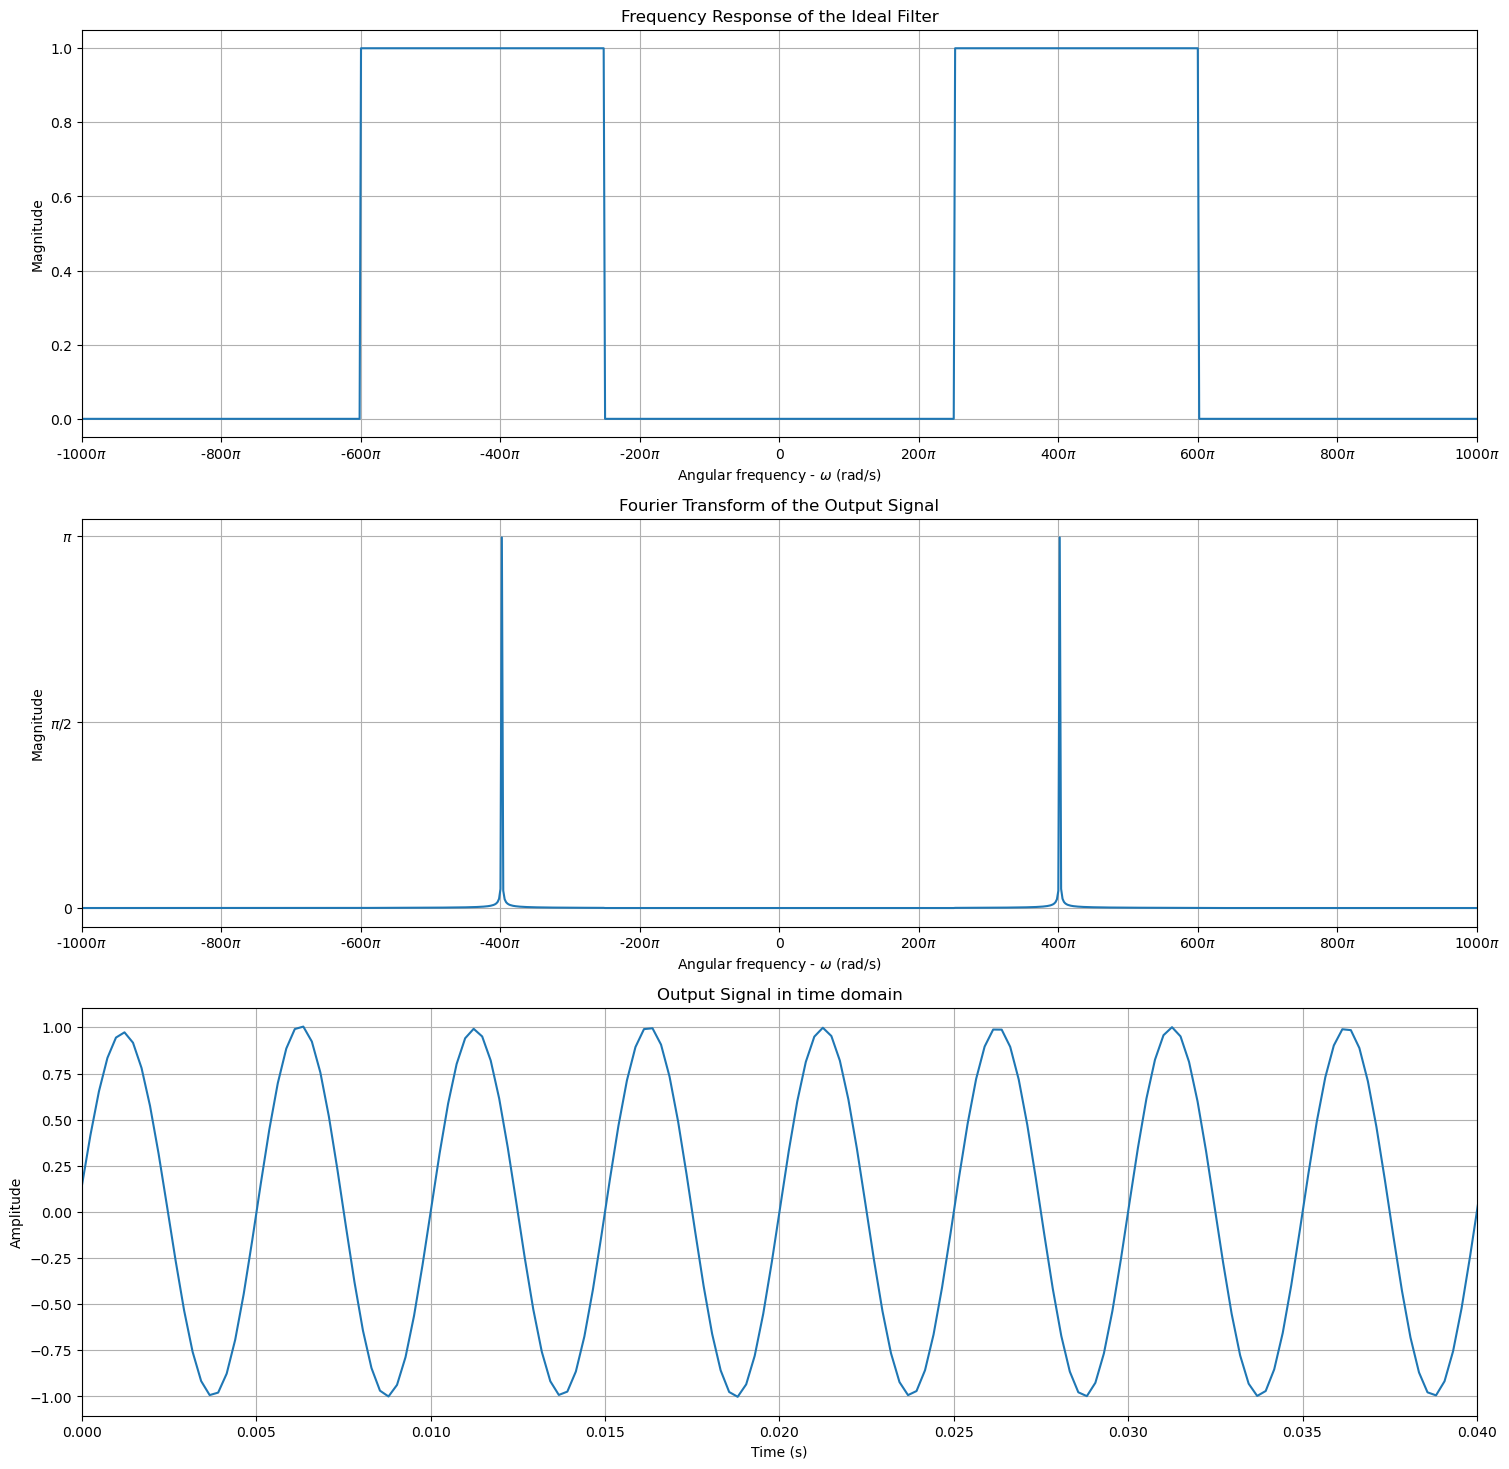

In [349]:
k = np.arange(1,4097)
w = k/4096*ws-ws/2

# transfer fnction's freq domain function by fourier. since convolution in TD is multiplication in FD
H0w = [ideal_filter(w_current) for w_current in w]

# Simulation of Filtering. since we use freq domain signal, convolution converts as multiplication.
Y0w = np.multiply(Xw,H0w)
# Obtaining the time domain signal- inverse fourier transform to get the time domian filtered signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))

# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

## 2.3.2 Ideal Filter: Part B
### Actual filter

In [350]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)
# Filtering
y = signal.lfilter(b,a,xt)
# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)


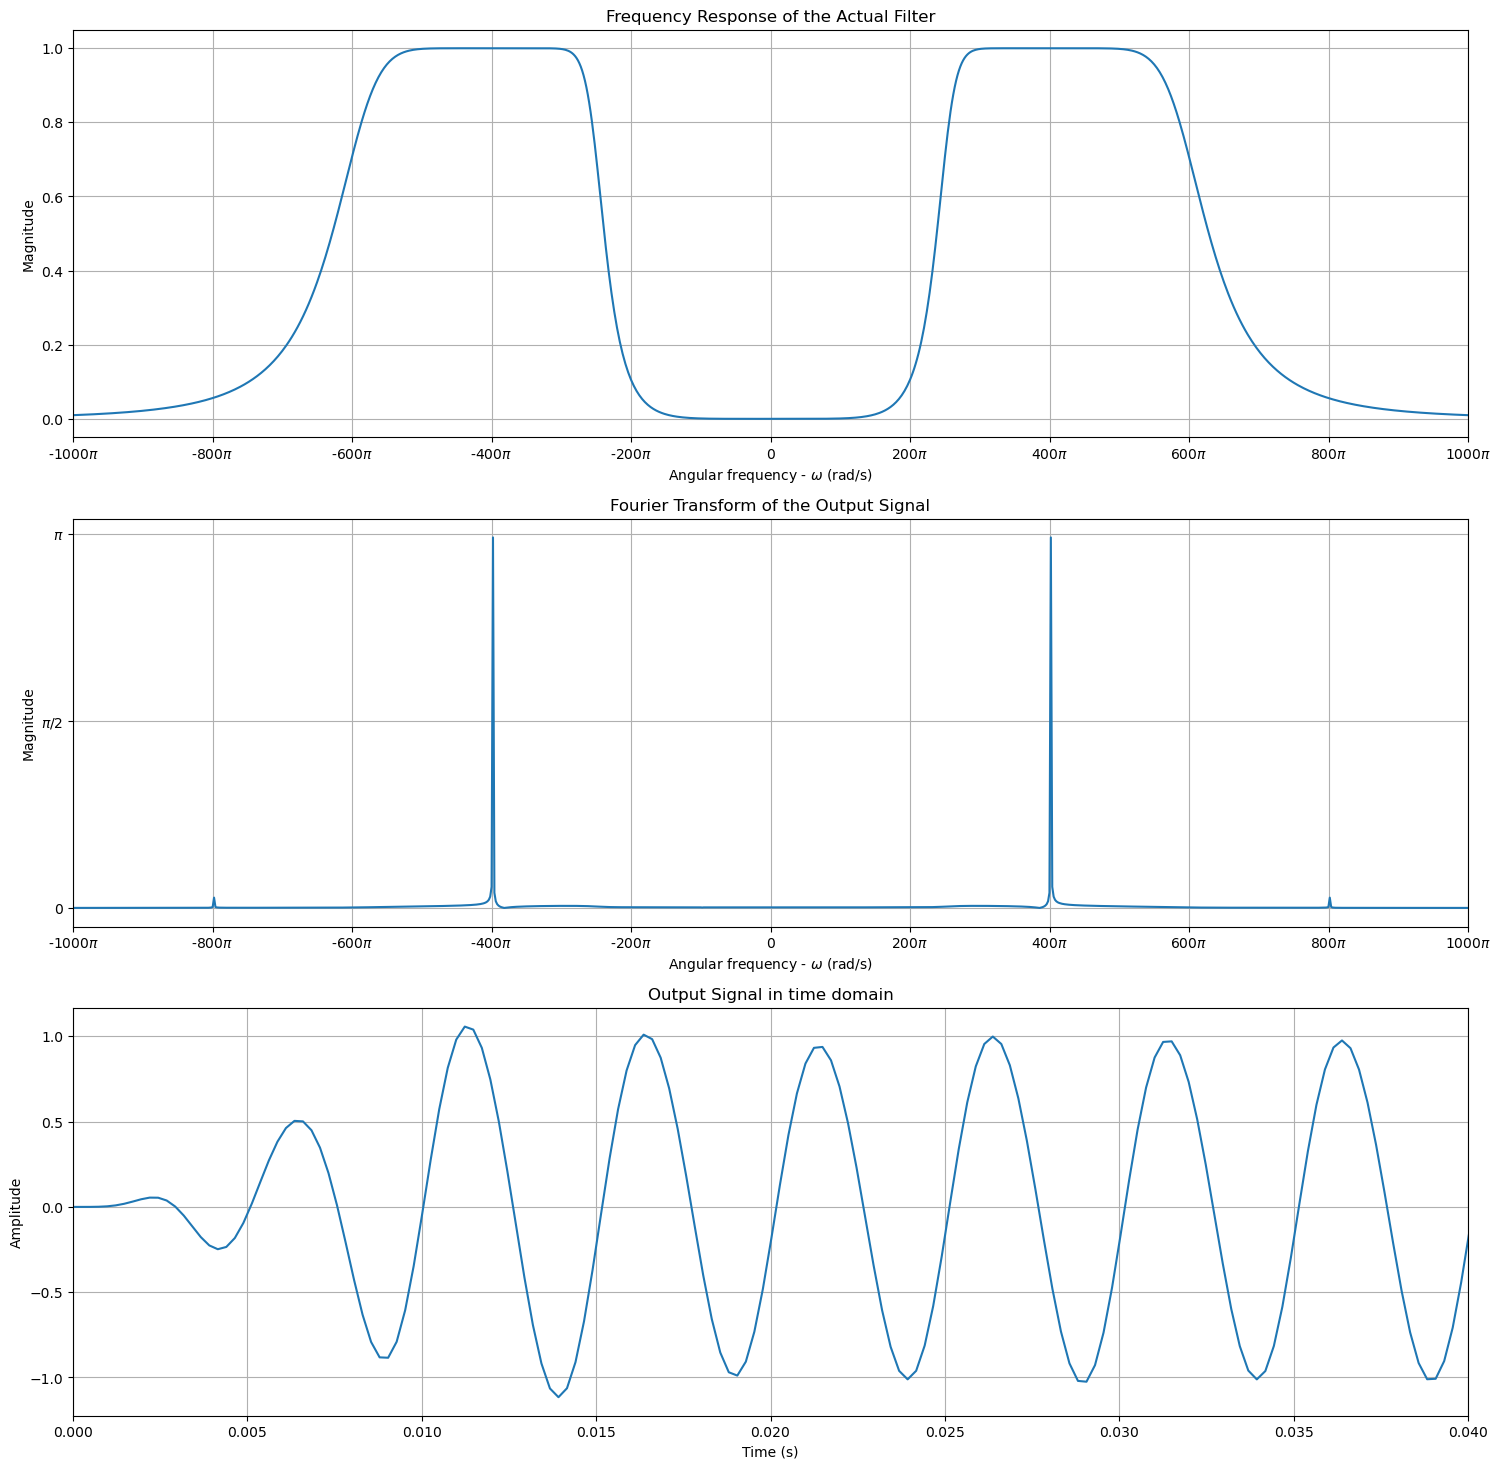

In [351]:
# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# # Output signal in time domain
axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()


Q: Comment on your observations in Part - A and Part - B. [Graded]
* since the butterworth bandpass filter is realistic, time domain starts from zero and no negatives. and the signal starts from t=0. hence why the increment in amplitude till it reaches its maximum.
* realistic filter allows higher freq to limited magnitudes, thats why the 800 pi componenet is there